# Predicting Arrival Times for Denver airpot using Random Forests and Naive Bayes


#### Given a series of data for 2008 for Flight arrival times for Denver airport to predict arrival times for planes in order to help a potential passenger figure out which flight to book so that they can avoid getting delayed.


In [282]:
#make the necessary imports here

import os
import pandas as pd
import datetime as datetime
import numpy as np
import seaborn as sns

#### data frame contains 299999 rows of data.

In [283]:
#your code goes here
path = '../ML_4/'
filename = '2008_data.csv'
den = pd.read_csv(path+filename)
print("file read")
den.shape[0]

file read


299999

In [284]:
############################# Data Exploration ###############################

In [285]:
#missing data
total = den.isnull().sum().sort_values(ascending=False)
percent = (den.isnull().sum()/den.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data
#missing_data.head(20)
#when more than 15% of the data is missing, we should delete the corresponding variable 
# This means we will not consider these variables in the model - 
# CancelleationCode,LateAircraftDelay,SecurityDelay, NASDelay,WeatherDelay and CarrierDelay

,Total,Percent
CancellationCode,291683,0.972280
LateAircraftDelay,226745,0.755819
SecurityDelay,226745,0.755819
NASDelay,226745,0.755819
WeatherDelay,226745,0.755819
CarrierDelay,226745,0.755819
ArrTime,8924,0.029747
ActualElapsedTime,8924,0.029747
AirTime,8924,0.029747
ArrDelay,8924,0.029747


In [286]:
den = den.drop('CancellationCode', axis = 1)

In [287]:
den = den.drop('LateAircraftDelay', axis = 1)

In [288]:
den = den.drop('SecurityDelay', axis = 1)

In [289]:
den = den.drop('NASDelay', axis = 1)

In [290]:
den = den.drop('WeatherDelay', axis = 1)

In [291]:
den = den.drop('CarrierDelay', axis = 1)

In [292]:
den['ArrDelay'].fillna(0, inplace=True)

In [293]:
#For rest of the variables, we will replace NaN with 0
den.replace(np.nan, 0)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,0
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,0
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,0
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,78.0,-6.0,-4.0,IND,BWI,515,3.0,7.0,0,0
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,0
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,0
6,2008,1,3,4,1937.0,1830,2037.0,1940,WN,509,...,230.0,57.0,67.0,IND,LAS,1591,3.0,7.0,0,0
7,2008,1,3,4,1039.0,1040,1132.0,1150,WN,535,...,219.0,-18.0,-1.0,IND,LAS,1591,7.0,7.0,0,0
8,2008,1,3,4,617.0,615,652.0,650,WN,11,...,70.0,2.0,2.0,IND,MCI,451,6.0,19.0,0,0
9,2008,1,3,4,1620.0,1620,1639.0,1655,WN,810,...,70.0,-16.0,0.0,IND,MCI,451,3.0,6.0,0,0


In [294]:
#We will create new variable Status, based on ArrDelay variable
#Status represents wether the flight was on time (1), slightly delayed (2), highly delayed (3), diverted (4), or cancelled (5)
for dataset in den:
    den.loc[den['ArrDelay'] <= 15, 'Status'] = 1
    den.loc[den['ArrDelay'] >= 15, 'Status'] = 2
    den.loc[den['ArrDelay'] >= 60, 'Status'] = 3
    den.loc[den['Diverted'] == 1, 'Status'] = 4
    den.loc[den['Cancelled'] == 1, 'Status'] = 5


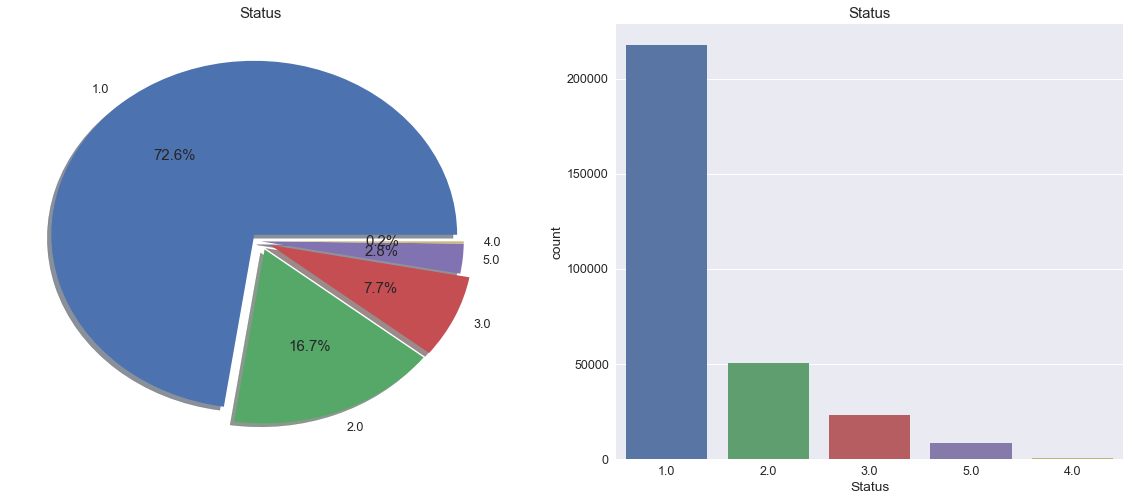

Status represents wether the flight was on time (1), slightly delayed (2), highly delayed (3), diverted (4), or cancelled (5)


In [295]:
f,ax=plt.subplots(1,2,figsize=(20,8))
den['Status'].value_counts().plot.pie(explode=[0.05,0.05,0.05,0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Status')
ax[0].set_ylabel('')
sns.countplot('Status',order = den['Status'].value_counts().index, data=den,ax=ax[1])
ax[1].set_title('Status')
plt.show()

print('Status represents wether the flight was on time (1), slightly delayed (2), highly delayed (3), diverted (4), or cancelled (5)')

#https://www.kaggle.com/adveros/flight-delay-eda-exploratory-data-analysis

In [296]:
#Correlation Matrix
#The values show the correlation score between the row and column at each point. 
#Values will range from 1 (very strong positve correlation, as one goes up, the other tends to, too) 
#to -1 (very strong negative correlation, one goes up will tend to push the other down, or vice-versa), 
#via 0 (no relationship).
den.corr()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,Status
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DayofMonth,NaN,NaN,1.000000,-0.041503,-0.011669,-0.008106,-0.002975,-0.003320,0.010822,-0.000973,-0.010730,-0.002769,-0.008811,-0.025821,-0.011010,-0.025103,0.021408,0.003817,0.004162,-0.009214
DayOfWeek,NaN,NaN,-0.041503,1.000000,0.008729,0.013283,0.005514,0.008860,-0.004102,0.011592,0.016074,0.013712,-0.003130,0.005039,0.017712,0.011405,-0.015248,-0.012727,-0.000455,-0.006769
DepTime,NaN,NaN,-0.011669,0.008729,1.000000,0.965583,0.740783,0.811579,-0.003221,-0.049083,-0.040390,-0.045897,0.190240,0.223897,-0.034031,-0.012947,-0.023633,NaN,-0.006162,0.199795
CRSDepTime,NaN,NaN,-0.008106,0.013283,0.965583,1.000000,0.722622,0.812271,-0.007948,-0.050065,-0.039768,-0.044848,0.109247,0.142139,-0.031543,-0.016900,-0.034393,0.013715,-0.009663,0.100432
ArrTime,NaN,NaN,-0.002975,0.005514,0.740783,0.722622,1.000000,0.863637,-0.009374,0.015113,0.018718,0.015444,0.079118,0.093317,0.017779,0.004185,-0.000728,NaN,NaN,0.112220
CRSArrTime,NaN,NaN,-0.003320,0.008860,0.811579,0.812271,0.863637,1.000000,-0.013947,0.017680,0.028027,0.021763,0.102430,0.135068,0.029299,-0.002767,-0.020019,0.008369,-0.008849,0.092611
FlightNum,NaN,NaN,0.010822,-0.004102,-0.003221,-0.007948,-0.009374,-0.013947,1.000000,-0.231596,-0.261808,-0.270070,0.075799,0.041024,-0.297050,0.079817,0.151101,0.080524,0.007352,0.105768
ActualElapsedTime,NaN,NaN,-0.000973,0.011592,-0.049083,-0.050065,0.015113,0.017680,-0.231596,1.000000,0.976775,0.983798,0.062853,0.039930,0.954097,0.161603,0.228785,NaN,NaN,0.091198


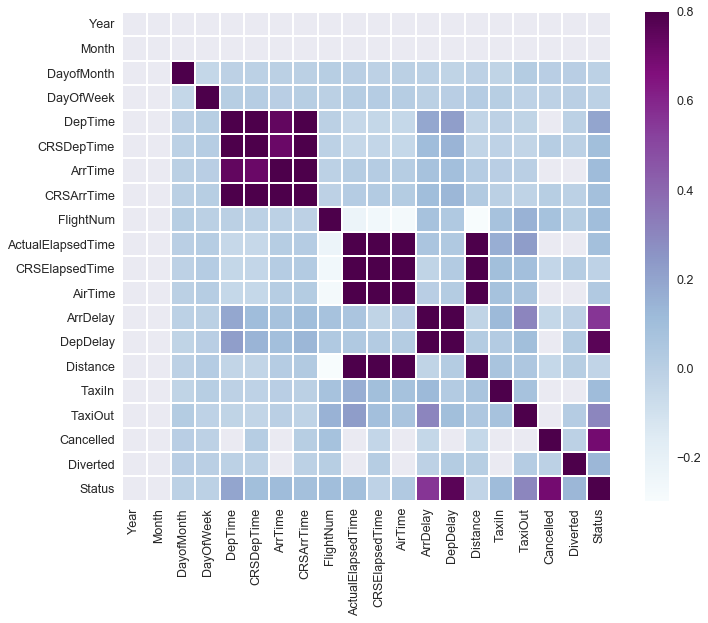

In [297]:
#correlation matrix in the form of heatmap
corrmat = den.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8,cmap="BuPu", square=True, linewidth = 1);
#To get better color vision, I used Blue-Purple colors as indicated by camp = "BuPu"
# dark colors shows strong correlation
# We can also display correlation values by using attribute annot = True
#https://www.youtube.com/watch?v=Gj-prU8aEgg

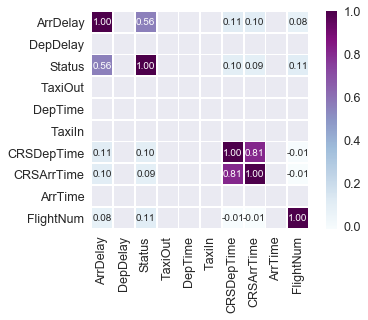

In [298]:
#correlation matrix
k = 10 #number of variables for heatmap for better clarity
cols = corrmat.nlargest(k, 'ArrDelay')['ArrDelay'].index
cm = np.corrcoef(den[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True,cmap="BuPu",linewidth = 0.7, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Variable descriptions
Name	Description
1	Year	1987-2008
2	Month	1-12
3	DayofMonth	1-31
4	DayOfWeek	1 (Monday) - 7 (Sunday)
5	DepTime	actual departure time (local, hhmm)
6	CRSDepTime	scheduled departure time (local, hhmm)
7	ArrTime	actual arrival time (local, hhmm)
8	CRSArrTime	scheduled arrival time (local, hhmm)
9	UniqueCarrier	unique carrier code
10	FlightNum	flight number
11	TailNum	plane tail number
12	ActualElapsedTime	in minutes
13	CRSElapsedTime	in minutes
14	AirTime	in minutes
15	ArrDelay	arrival delay, in minutes
16	DepDelay	departure delay, in minutes
17	Origin	origin IATA airport code
18	Dest	destination IATA airport code
19	Distance	in miles
20	TaxiIn	taxi in time, in minutes
21	TaxiOut	taxi out time in minutes
22	Cancelled	was the flight cancelled?
23	CancellationCode	reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
24	Diverted	1 = yes, 0 = no
25	CarrierDelay	in minutes
26	WeatherDelay	in minutes
27	NASDelay	in minutes
28	SecurityDelay	in minutes
29	LateAircraftDelay	in minutes


#### Question 2 (2 points) Write code to figure out which day of the week has the most delays? You may need to first transform the data in order to do this. Also, plot a graph which shows the delay vs. day of week. 

#### (Hint 1: the sample output shown below is only for illustration purposes and may not match what you get.) 

#your code goes here

#den['DayOfWeek','DepDelay']
#to find a column that has ATLEAST 1 non-zero value
#den.loc[:, den.any()]

#to find a column that has no non-zero value
#den.loc[:, den.all()]

#to select columns without NaN values
#den.loc[:, den.notnull().all()]

#Drops all values in a column with NaN value
#den = den.dropna(how='all', axis=1)

#Drops all values in a row with NaN value
#den = den.dropna(how='any', axis=1)

#Checking the unique values in DayOfWeek column
den['DayOfWeek'].unique().tolist()

#we can also check the number of unique elements for the DayOfWeek column by using len function
#len(den['DayOfWeek'].unique().tolist())

In [299]:
df = den[['DayOfWeek','ArrDelay']]
df.head()

,DayOfWeek,ArrDelay
0,4,-14.0
1,4,2.0
2,4,14.0
3,4,-6.0
4,4,34.0


In [302]:
#this will pick the highest value of the column and sort the values for both the columns in ascending order and then it will drop the duplicate values for DayOfWeek col
df_sort = (df.sort_values(['DayOfWeek','ArrDelay'], ascending=[True, False])
             .drop_duplicates(['DayOfWeek']).reset_index(drop=True)
          )
print(df_sort)
##https://stackoverflow.com/questions/42050339/pandas-get-highest-value-from-a-column-for-each-unique-value-in-another-column

   DayOfWeek  ArrDelay
0          1     631.0
1          2     626.0
2          3     759.0
3          4     687.0
4          5     587.0
5          6     500.0
6          7    1081.0


Text(0.5,0,'Day of the Week')

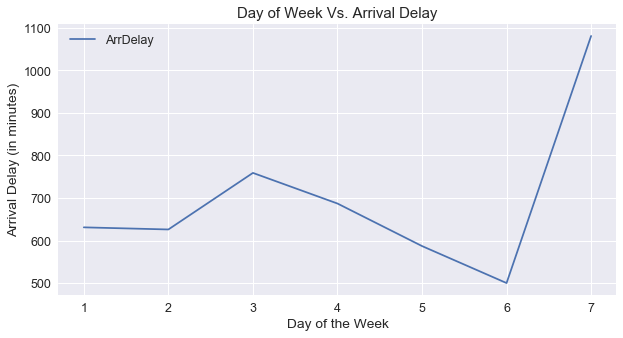

In [303]:
#your code to show plot as seen below goes here
import matplotlib.pyplot as plt
df_sort.plot(x='DayOfWeek', y='ArrDelay' ,figsize=(10,5), grid=True)
plt.title("Day of Week Vs. Arrival Delay")
plt.ylabel('Arrival Delay (in minutes)')
plt.xlabel('Day of the Week')

##https://datascience.stackexchange.com/questions/25596/how-to-plot-two-columns-of-single-dataframe-on-y-axis

# This plot is based on df_sort, which shows maximum delay / day
The code above shows Days of Week on X axis versus Arrival Delay on Y axis.
On day 7 we have maximum delay value in arrival time. And on day 6 we have minimum delay value.

In [ ]:
# Adding up the values of ArrDelay for each day of the week by using groupby
df_sum = df.groupby('DayOfWeek')['ArrDelay'].sum()
print(df_sum)

#we can also take mean after taking sum
#df_mean= den.groupby(["DayOfWeek"], as_index=False).agg({'ArrDelay': [np.mean]})

##https://stackoverflow.com/questions/51330281/sum-values-of-column-based-on-the-unique-values-of-another-column

Text(0.5,0,'Day of the Week')

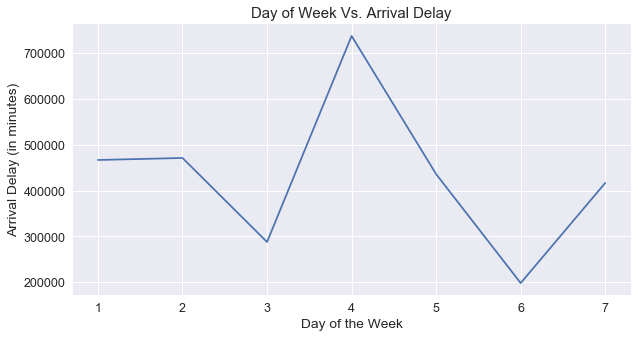

In [301]:
#your code to show plot as seen below goes here
import matplotlib.pyplot as plt
df_sum.plot(x='DayOfWeek', y='ArrDelay' ,figsize=(10,5), grid=True)
plt.title("Day of Week Vs. Arrival Delay")
plt.ylabel('Arrival Delay (in minutes)')
plt.xlabel('Day of the Week')

##https://datascience.stackexchange.com/questions/25596/how-to-plot-two-columns-of-single-dataframe-on-y-axis

# This plot is based on the SUM(arrDealy) / day for whole week
As per this plot the total delayed time in minutes is maximum on day 4 and minimum on day 6
We can also take mean, code is written above under df_mean

#### In my case, the delay seems to be on Wednesdays and Saturdays. 

#### Now that we understand the data a little bit (and you are free to do more exploration on your own, we will train two classifier to predict delays and use that information to avoid booking flights at that time.


#### Question 3 (3 points) Train a Random Forest Classifier using scikit-learn libraries to predict delay. Your outcome variable is ArrDelay. Use train-test split and report your accuracy in predicting. You are welcome to use all or a subset of the features given to you.


#### Question 4 (3 points) Train a Naive Bayes Classifier using scikit-learn libraries to predict delay. Your outcome variable is ArrDelay. Use train-test split and report your accuracy in predicting. You are welcome to use all or a subset of the features given to you.

#### Question 5 (1 point) Which classifier performed better for you? Why? 


In [ ]:
# regressor is not taking categorical variables. So tried to use Dummy coding on varaibles with less levels 
# Eg. UniqueCarrier has 7 levels, so I did dummy coding on it, 
# where as Origin and Dest varaib;es has 127 levels, so dummy coding will increase the dimensions a lot, 
# instead I used LabelEncoder there. However, adding these variables in my model, led to increse in MSE, (MSE values displayed in the markdown section below)
# so I dropped them from my RF model


#Dummy Coding on UniqueCarrier with 7 levels
UC_dummies = pd.get_dummies(den['UniqueCarrier'])
UC_dummies.columns.tolist()
den = pd.concat([den, UC_dummies], axis=1) 

In [145]:
#I Tried BACKWARD SELECTION approach here - putting all variables in the model, check the loss function value, 
#and then drop the variables so as to reduce loss function
#denNew = den[['DayofMonth','DayOfWeek','DepTime','ArrTime','FlightNum','AirTime','Distance','TaxiIn','TaxiOut','ArrDelay']]
denNew = den[['ActualElapsedTime','Year','DayofMonth','DayOfWeek','DepTime','ArrTime','FlightNum','AirTime','Distance','TaxiIn','TaxiOut','ArrDelay']]

In [146]:
#Drops all columns with NaN value
denNew = denNew.dropna()

In [147]:
# Y - the value we want to predict
y = np.array(denNew['ArrDelay'])

In [148]:
# Remove the label Y from the features X
# axis 1 refers to the columns
X = denNew.drop('ArrDelay', axis = 1)

In [150]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

In [151]:
# Split the data into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [152]:
#to check the shape of train and test datasets
print('Training Features Shape:', train_X.shape)
print('Training Labels Shape:', train_y.shape)
print('Testing Features Shape:', test_X.shape)
print('Testing Labels Shape:', test_y.shape)

Training Features Shape: (203752, 11)
Training Labels Shape: (203752,)
Testing Features Shape: (87323, 11)
Testing Labels Shape: (87323,)


#Using LabelEncoder to deal with categorical features - Origin and Dest for both train and test dataset
#If we don't do this transformation, then we get error while training and fiting random forest on train and test data
#error - could not convert string to float: 'BUR'
#Source: https://stackoverflow.com/questions/30384995/randomforestclassfier-fit-valueerror-could-not-convert-string-to-float
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for Origin in train_X.columns:
    if train_X[Origin].dtype == object:
        train_X[Origin] = le.fit_transform(train_X[Origin])
    else:
        pass

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for Origin in test_X.columns:
    if test_X[Origin].dtype == object:
        test_X[Origin] = le.fit_transform(test_X[Origin])
    else:
        pass

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for Dest in train_X.columns:
    if train_X[Dest].dtype == object:
        train_X[Dest] = le.fit_transform(train_X[Dest])
    else:
        pass

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for Dest in test_X.columns:
    if test_X[Dest].dtype == object:
        test_X[Dest] = le.fit_transform(test_X[Dest])
    else:
        pass

In [153]:
# Import the model 
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with N number of decision trees
rf = RandomForestRegressor(n_estimators = 600, random_state = 42)
# Train the model on training data
rf.fit(train_X, train_y);

In [156]:
# Use predict method on the test data to predict y values - ArrDelay
predictions = rf.predict(test_X)

In [157]:
#Evaluate the performance of model using these loss functions
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(test_y, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, predictions)))

Mean Absolute Error: 18.092144814844502
Mean Squared Error: 987.4230173672267
Root Mean Squared Error: 31.42328781918319


# MSE with different sets of features and Decision Trees
With 20 decision trees in RandomForestRegressor function, performance is -
Mean Absolute Error: 1861.6667425035264
Mean Squared Error: 7795079.913181963
Root Mean Squared Error: 2791.967032968327

With 200 decision trees -
Mean Absolute Error: 1766.9423260681622
Mean Squared Error: 6982693.838804659
Root Mean Squared Error: 2642.4787300571898

With 600 decision trees - 
Mean Absolute Error: 1765.2035628156711
Mean Squared Error: 6967138.656598717
Root Mean Squared Error: 2639.533795312861

With 800 decision trees - 
Mean Absolute Error: 1765.0937229831188
Mean Squared Error: 6963495.071036368
Root Mean Squared Error: 2638.8435101453756

#When included dummy UC variable and 250 decision trees
Mean Absolute Error: 101068.16813941847
Mean Squared Error: 23777139873.455193
Root Mean Squared Error: 154198.37831006912

With Origin column - 250 DTs
Mean Absolute Error: 1739.7742621831915
Mean Squared Error: 6842841.671992356
Root Mean Squared Error: 2615.882579932126

With original and Dest columns - 200 DTs
Mean Absolute Error: 1757.194380488693
Mean Squared Error: 7261093.743269328
Root Mean Squared Error: 2694.6416725177633

With original and Dest columns - 250 DTs
Mean Absolute Error: 1755.7773599672387
Mean Squared Error: 7252056.184214115
Root Mean Squared Error: 2692.964200321667

With original and Dest columns - 800 DTs
Mean Absolute Error: 1751.9403262501705
Mean Squared Error: 7216381.272831767
Root Mean Squared Error: 2686.3323087123395

With original and Dest columns - 1000 DTs
Mean Absolute Error: 1751.709233289348
Mean Squared Error: 7214136.922889111
Root Mean Squared Error: 2685.9145412483085

denNew = den[['DayOfWeek','DepTime','ArrTime','FlightNum','AirTime','Distance','WeatherDelay','ArrDelay']] + 200 DTs
Mean Absolute Error: 1669.221745461164
Mean Squared Error: 6711008.186530008
Root Mean Squared Error: 2590.5613651349795

denNew = den[['DayOfWeek','DepTime','ArrTime','FlightNum','AirTime','Distance','WeatherDelay','ArrDelay']] + 300 DTs
Mean Absolute Error: 1666.2134686262912
Mean Squared Error: 6689201.954496065
Root Mean Squared Error: 2586.3491555658265

denNew = den[['DayOfWeek','DepTime','ArrTime','FlightNum','AirTime','Distance','WeatherDelay','ArrDelay']] + 500 DTs
Mean Absolute Error: 1664.7608627201166
Mean Squared Error: 6677145.830600283
Root Mean Squared Error: 2584.0173820236355

denNew = den[['DayOfWeek','DepTime','ArrTime','FlightNum','AirTime','Distance','WeatherDelay','ArrDelay']] + 600 DTs
Mean Absolute Error: 1664.3353323929564
Mean Squared Error: 6674498.286908131
Root Mean Squared Error: 2583.505039071558

# Final RMSE 31.42
denNew = den[['ActualElapsedTime','Year','DayofMonth','DayOfWeek','DepTime','ArrTime','FlightNum','AirTime','Distance','TaxiIn','TaxiOut','ArrDelay']] + 600 DTs
Mean Absolute Error: 18.092144814844502
Mean Squared Error: 987.4230173672267
Root Mean Squared Error: 31.42328781918319

**https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/

In [ ]:
### In this sheet I have used RF Regressor with ArrDelay as Y variable, I have used seperate sheet to run RF Classifier and NB